## In this notebook we analyse the available datasets to determine which ones to use

In [1]:
# reload imported files automatically without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lib import *
from collections import namedtuple


In [3]:
sns.set()


In [4]:
# define column names for table
column_names = [
    "name",
    "title",
    "nodes",
    "edges",
    "avg_degree",
    "std_dev_degree",
    "largest_eigenvalue_hashimoto",
    "random walk mixing time",
    "degree assortativity",
    "global clustering",
    "pseudo_diameter",
    "relative_size_of_largest_component",
    "kind",
    "mode",
    "number_of_networks",
    "tags",
]


In [5]:
df = pd.read_html("https://networks.skewed.de/")[
    0
]  # get a dataframe of all datasets on Netzschleuder


In [6]:
df.columns = column_names  # set column names


### We create filters for our categories that we compare

In [7]:
# create dataset filters for social network datasets
social_networks = df["tags"].str.contains("Social")
unweighted = df["tags"].str.contains("Unweighted")
undirected = df["kind"] == "Undirected"
online = df["tags"].str.contains("Online")
offline = df["tags"].str.contains("Offline")


In [8]:
online_social_filter = (
    online & social_networks & unweighted & undirected
)  # filter for desired online social networks
offline_social_filter = (
    offline & social_networks & unweighted & undirected
)  # filter for desired offline social networks


### We apply filters to filter datasets

**NOTE**: These datasets contain multiple networks, we will filter them further, and from now on call these **network groups**

In [9]:
online_social = df[online_social_filter]
# filter df for social, unweighted, online, undirected networks
len(online_social)
print("Number of online social network groups:", len(online_social))
online_social.head(3)


Number of online social network groups: 15


,name,title,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random walk mixing time,degree assortativity,global clustering,pseudo_diameter,relative_size_of_largest_component,kind,mode,number_of_networks,tags
74,douban,Douban friendship network (2009),154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,1,Social Online Unweighted
82,ego_social,Ego networks in social media (2012),107614,12238285,227.45,581.50,1718.72,110.57,-0.08,0.15,6,1.00,Undirected,Unipartite,143,Social Online Unweighted Metadata
96,facebook_friends,Maier Facebook friends (2014),362,1988,10.98,10.83,23.30,78.68,0.10,0.51,9,0.91,Undirected,Unipartite,1,Social Online Unweighted Metadata


In [10]:
# filter df for social, unweighted, online, undirected networks
offline_social = df[social_networks & offline & unweighted & undirected]
print("Number of offline social network groups:", len(offline_social))
online_social.head(3)


Number of offline social network groups: 17


,name,title,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random walk mixing time,degree assortativity,global clustering,pseudo_diameter,relative_size_of_largest_component,kind,mode,number_of_networks,tags
74,douban,Douban friendship network (2009),154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,1,Social Online Unweighted
82,ego_social,Ego networks in social media (2012),107614,12238285,227.45,581.50,1718.72,110.57,-0.08,0.15,6,1.00,Undirected,Unipartite,143,Social Online Unweighted Metadata
96,facebook_friends,Maier Facebook friends (2014),362,1988,10.98,10.83,23.30,78.68,0.10,0.51,9,0.91,Undirected,Unipartite,1,Social Online Unweighted Metadata


In [11]:
online_social.agg(
    {"nodes": ["mean", "median", "std"], "edges": ["mean", "median", "std"]}
).style.format("{:.0f}").set_caption("Online Social Network Groups")


,nodes,edges
mean,5082770,126652876
median,154908,2777419
std,16781456,464657993


In [12]:
offline_social.agg(
    {"nodes": ["mean", "median", "std"], "edges": ["mean", "median", "std"]}
).style.format("{:.0f}").set_caption("Offline Social Network Groups")


,nodes,edges
mean,905,192800
median,180,20818
std,2617,416200


### We filter dataset groups into networks

In [13]:
BASE_URL = "https://networks.skewed.de/net/"


In [14]:
NetworkProperties = namedtuple(
    "NetworkProperties", ["group", "name", "nodes", "edges"]
)  # create tuple to hold network properties


In [15]:
online_network_group_names = online_social["name"].to_numpy()
online_network_group_names


array(['douban', 'ego_social', 'facebook_friends',
       'facebook_organizations', 'flickr_groups', 'flixster',
       'foursquare', 'foursquare_friendships', 'foursquare_global',
       'hyves', 'lastfm', 'livemocha', 'marker_cafe', 'petster',
       'soc_net_comms'], dtype=object)

In [16]:
offline_network_group_names = offline_social["name"].to_numpy()
offline_network_group_names


array(['contact', 'copenhagen', 'crime', 'dutch_criticism', 'karate',
       'november17', 'reality_mining', 'sp_colocation', 'sp_high_school',
       'sp_high_school_new', 'sp_hospital', 'sp_hypertext',
       'sp_infectious', 'sp_kenyan_households', 'student_cooperation',
       'terrorists_911', 'ugandan_village'], dtype=object)

In [17]:
def get_network_data(network_group_names: list) -> pd.DataFrame:
    """
    Get info of all networks contained in the network groups.
    """
    result_tuples = []

    for network_group in network_group_names:
        URL = BASE_URL + network_group
        df = pd.read_html(URL)[0]
        for i, row in df.iterrows():
            curr_result = NetworkProperties(
                group=network_group,
                name=row["Name"],
                nodes=row["Nodes"],
                edges=row["Edges"],
            )
            result_tuples.append(curr_result)

    return pd.DataFrame(result_tuples)


In [18]:
all_online_networks = get_network_data(online_network_group_names)
all_online_networks


,group,name,nodes,edges
0,douban,douban,154908,327162
1,ego_social,facebook_0,333,2519
2,ego_social,facebook_107,1034,26749
3,ego_social,facebook_348,224,3192
4,ego_social,facebook_414,150,1693
...,...,...,...,...
165,soc_net_comms,livejournal,3997962,34681189
166,soc_net_comms,orkut,3072441,117185083
167,soc_net_comms,youtube,1134890,2987624
168,soc_net_comms,dblp,317080,1049866


In [19]:
all_offline_networks = get_network_data(offline_network_group_names)
all_offline_networks


,group,name,nodes,edges
0,contact,contact,274,28244
1,copenhagen,sms,568,24333
2,copenhagen,fb_friends,800,6429
3,copenhagen,calls,536,3600
4,copenhagen,bt,692,2426279
...,...,...,...,...
59,ugandan_village,health-advice_13,173,358
60,ugandan_village,health-advice_14,120,365
61,ugandan_village,health-advice_15,117,210
62,ugandan_village,health-advice_16,350,984


###  We check the network size distribution of available datasets

In this first linearly scaled plot, we can see that there is an extreme outlier present in the online
social network datasets.

In [20]:
online_sizes = sorted(all_online_networks["nodes"].to_numpy())
online_sizes


[8,
 19,
 22,
 34,
 35,
 52,
 54,
 61,
 83,
 92,
 94,
 97,
 102,
 108,
 117,
 120,
 131,
 150,
 165,
 168,
 168,
 175,
 215,
 224,
 252,
 258,
 268,
 296,
 307,
 320,
 320,
 321,
 326,
 333,
 338,
 344,
 362,
 373,
 417,
 422,
 452,
 461,
 475,
 476,
 488,
 492,
 495,
 498,
 511,
 521,
 534,
 550,
 559,
 562,
 575,
 627,
 638,
 694,
 747,
 762,
 769,
 773,
 780,
 786,
 792,
 851,
 923,
 1007,
 1034,
 1052,
 1079,
 1083,
 1175,
 1179,
 1187,
 1243,
 1302,
 1371,
 1374,
 1429,
 1473,
 1520,
 1548,
 1556,
 1589,
 1604,
 1650,
 1662,
 1730,
 1743,
 1842,
 1889,
 2009,
 2017,
 2156,
 2187,
 2213,
 2224,
 2332,
 2426,
 2455,
 2512,
 2590,
 2614,
 2658,
 2761,
 3091,
 3100,
 3134,
 3143,
 3154,
 3347,
 3455,
 3490,
 3508,
 3545,
 3799,
 3814,
 3862,
 3870,
 3939,
 4039,
 4160,
 4229,
 4289,
 4362,
 4369,
 4450,
 4482,
 4503,
 4520,
 4586,
 4604,
 4712,
 4720,
 4720,
 4734,
 4782,
 4805,
 4831,
 4842,
 4872,
 4880,
 4895,
 4903,
 4926,
 4936,
 4938,
 5524,
 5793,
 6410,
 69413,
 104103,
 10761

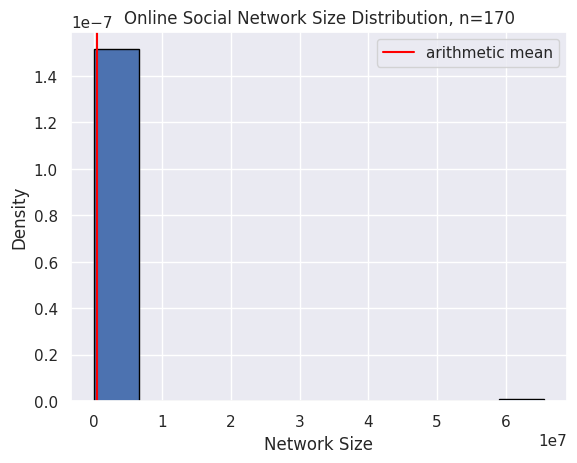

In [22]:
plot_distribution(
    online_sizes,
    xlabel="Network Size",
    title="Online Social Network Size Distribution, n={}".format(len(online_sizes)),
)
plt.ticklabel_format(useOffset=False)

plot_vertical_line(np.mean(online_sizes), "arithmetic mean")
plt.legend()


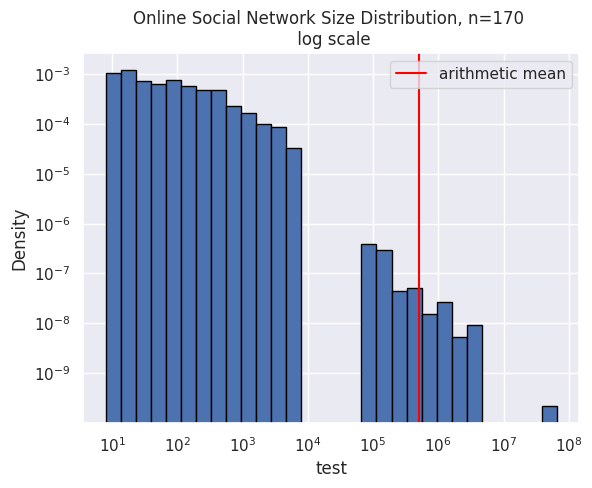

In [23]:
plot_distribution(
    online_sizes,
    xlabel="test",
    title="Online Social Network Size Distribution, n={} \n log scale".format(
        len(online_sizes)
    ),
    bins=logarithmic_bins(online_sizes, 30),
    x_scale="log",
    y_scale="log",
)

plot_vertical_line(np.mean(online_sizes), "arithmetic mean")
plt.legend()


### The available offline social networks are in generall smaller than online social networks

In [24]:
offline_sizes = sorted(all_offline_networks["nodes"].to_numpy())
offline_sizes


[22,
 34,
 34,
 35,
 47,
 62,
 63,
 65,
 75,
 81,
 96,
 100,
 113,
 113,
 117,
 120,
 120,
 121,
 121,
 124,
 126,
 134,
 139,
 168,
 170,
 173,
 173,
 178,
 180,
 182,
 183,
 184,
 185,
 185,
 190,
 192,
 203,
 205,
 207,
 221,
 229,
 232,
 240,
 242,
 250,
 274,
 316,
 320,
 329,
 329,
 329,
 329,
 332,
 350,
 361,
 369,
 372,
 403,
 536,
 568,
 692,
 800,
 1380,
 10972]

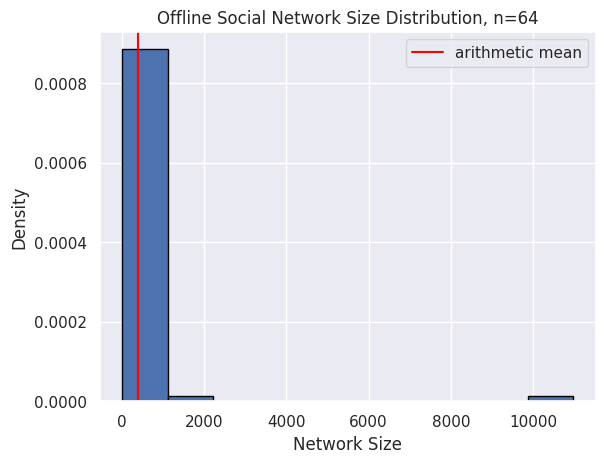

In [25]:
plot_distribution(
    offline_sizes,
    xlabel="Network Size",
    title="Offline Social Network Size Distribution, n={}".format(len(offline_sizes)),
)
plt.ticklabel_format(useOffset=False)

plot_vertical_line(np.mean(offline_sizes), "arithmetic mean")
plt.legend()


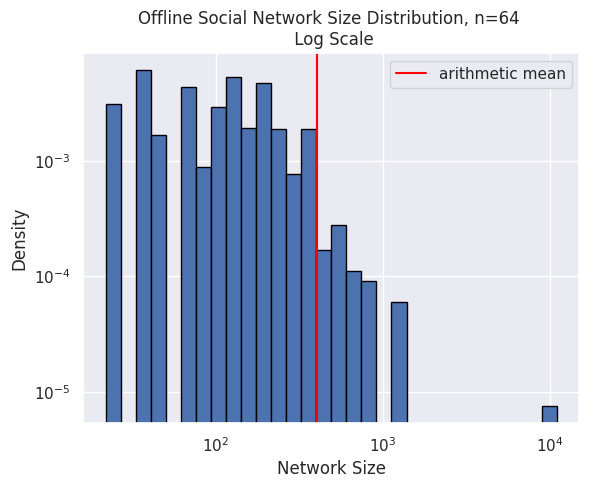

In [26]:
plot_distribution(
    offline_sizes,
    xlabel="Network Size",
    title="Offline Social Network Size Distribution, n={} \n Log Scale".format(
        len(offline_sizes)
    ),
    bins=logarithmic_bins(offline_sizes, 30),
    x_scale="log",
    y_scale="log",
)

plot_vertical_line(np.mean(offline_sizes), "arithmetic mean")
plt.legend()


Create q-cuts to split the networks into groups by network size

In [27]:
def add_q_cut_column(df: pd.DataFrame, column: str, q: int, labels) -> pd.DataFrame:
    """
    Add a column to the dataframe with the quantile cut of the column.
    """
    df[column + "_qcut"] = pd.qcut(df[column], q=q, labels=labels)
    return df

In [28]:
add_q_cut_column(all_online_networks, "nodes", 3, ["small", "medium", "large"])

,group,name,nodes,edges,nodes_qcut
0,douban,douban,154908,327162,large
1,ego_social,facebook_0,333,2519,small
2,ego_social,facebook_107,1034,26749,medium
3,ego_social,facebook_348,224,3192,small
4,ego_social,facebook_414,150,1693,small
...,...,...,...,...,...
165,soc_net_comms,livejournal,3997962,34681189,large
166,soc_net_comms,orkut,3072441,117185083,large
167,soc_net_comms,youtube,1134890,2987624,large
168,soc_net_comms,dblp,317080,1049866,large


In [29]:
all_online_networks.groupby("nodes_qcut").agg(
    {"nodes": ["mean", "median", "std", "count"]}
).style.format("{:.0f}").set_caption("Online Social Network Size Groups")


ego_social network group contains the most balanced network sizes

In [30]:
all_online_networks.groupby("group").agg({
    "nodes_qcut": lambda x: x.value_counts().to_dict()
})

,nodes_qcut
group,
douban,"{'large': 1, 'small': 0, 'medium': 0}"
ego_social,"{'medium': 55, 'small': 54, 'large': 34}"
facebook_friends,"{'small': 1, 'medium': 0, 'large': 0}"
facebook_organizations,"{'large': 3, 'small': 2, 'medium': 1}"
flickr_groups,"{'large': 1, 'small': 0, 'medium': 0}"
flixster,"{'large': 1, 'small': 0, 'medium': 0}"
foursquare,"{'large': 2, 'small': 0, 'medium': 0}"
foursquare_friendships,"{'large': 2, 'small': 0, 'medium': 0}"
foursquare_global,"{'large': 1, 'small': 0, 'medium': 0}"


In [31]:
# example how to get smallest 25% of online networks
all_online_networks[all_online_networks["nodes_qcut"] == "small"].head(3)

,group,name,nodes,edges,nodes_qcut
1,ego_social,facebook_0,333,2519,small
3,ego_social,facebook_348,224,3192,small
4,ego_social,facebook_414,150,1693,small


In [32]:
add_q_cut_column(all_offline_networks, "nodes", 3, ["small", "medium", "large"])

,group,name,nodes,edges,nodes_qcut
0,contact,contact,274,28244,large
1,copenhagen,sms,568,24333,large
2,copenhagen,fb_friends,800,6429,large
3,copenhagen,calls,536,3600,large
4,copenhagen,bt,692,2426279,large
...,...,...,...,...,...
59,ugandan_village,health-advice_13,173,358,medium
60,ugandan_village,health-advice_14,120,365,small
61,ugandan_village,health-advice_15,117,210,small
62,ugandan_village,health-advice_16,350,984,large


In [33]:
all_offline_networks.groupby("nodes_qcut").agg(
    {"nodes": ["mean", "median", "std", "count"]}
).style.format("{:.0f}").set_caption("Offline Social Network Size Groups")


Ugandan village networks (the ones also used in the paper) have the most balanced distribution of network sizes into groups

In [34]:
all_offline_networks.groupby("group").agg({
    "nodes_qcut": lambda x: x.value_counts().to_dict()
})

,nodes_qcut
group,
contact,"{'large': 1, 'small': 0, 'medium': 0}"
copenhagen,"{'large': 4, 'small': 0, 'medium': 0}"
crime,"{'large': 1, 'small': 0, 'medium': 0}"
dutch_criticism,"{'small': 1, 'medium': 0, 'large': 0}"
karate,"{'small': 2, 'medium': 0, 'large': 0}"
november17,"{'small': 1, 'medium': 0, 'large': 0}"
reality_mining,"{'small': 1, 'medium': 0, 'large': 0}"
sp_colocation,"{'large': 3, 'small': 2, 'medium': 1}"
sp_high_school,"{'large': 4, 'small': 0, 'medium': 0}"


In [35]:
# example how to get smallest 25% of online networks
all_online_networks[all_online_networks["nodes_qcut"] == "small"].head(3)

,group,name,nodes,edges,nodes_qcut
1,ego_social,facebook_0,333,2519,small
3,ego_social,facebook_348,224,3192,small
4,ego_social,facebook_414,150,1693,small


In [36]:
all_online_networks

,group,name,nodes,edges,nodes_qcut
0,douban,douban,154908,327162,large
1,ego_social,facebook_0,333,2519,small
2,ego_social,facebook_107,1034,26749,medium
3,ego_social,facebook_348,224,3192,small
4,ego_social,facebook_414,150,1693,small
...,...,...,...,...,...
165,soc_net_comms,livejournal,3997962,34681189,large
166,soc_net_comms,orkut,3072441,117185083,large
167,soc_net_comms,youtube,1134890,2987624,large
168,soc_net_comms,dblp,317080,1049866,large


In [ ]:
all_offline_networks.to_csv(DATA_DIR_PATH / "offline_social_networks.csv", index=False)
all_online_networks.to_csv(DATA_DIR_PATH / "online_social_networks.csv", index=False)

In [36]:
BASE_URL = "https://networks.skewed.de/net/"

In [37]:
def remove_file_suffix(filename: str) -> str:
    """
    Remove file suffix from filename.
    """
    return filename.split(".")[0]

In [38]:
download_and_extract("https://networks.skewed.de/net/ego_social/files/facebook_0.gml.zst", remove_file_suffix("https://networks.skewed.de/net/ego_social/files/facebook_0.gml.zst"))

FileNotFoundError: [Errno 2] No such file or directory: 'https://networks'

In [39]:
def get_filename_from_url(url: str) -> str:
    """
    Get filename from url.
    """
    return url.split("/")[-1]

In [43]:
def get_group_name_from_url(url: str) -> str:
    """
    Get group from url.
    """
    return url.split("/")[-3]

In [45]:
get_group_name_from_url("https://networks.skewed.de/net/ego_social/files/facebook_0.gml.zst") # check if it works

'ego_social'

In [48]:
# download all online networks
for i, row in all_online_networks.iterrows():
    size = row["nodes_qcut"]
    url = BASE_URL + row["group"] + "/files/" + row["name"] + ".gml.zst"
    groupname = Path(get_group_name_from_url(url))
    filename = Path(get_filename_from_url(url))
    local_dir = DATA_DIR_PATH / "online" / size / groupname
    local_dir.mkdir(parents=True, exist_ok=True)
    local_path = local_dir / filename
    download_and_extract(url, remove_file_suffix(local_path))

KeyboardInterrupt: 

In [ ]:
# download all offline networks
for i, row in all_offline_networks.iterrows():
    size = row["nodes_qcut"]
    url = BASE_URL + row["group"] + "/files/" + row["name"] + ".gml.zst"
    groupname = Path(get_group_name_from_url(url))
    filename = Path(get_filename_from_url(url))
    local_dir = DATA_DIR_PATH / "offline" / size / groupname
    local_dir.mkdir(parents=True, exist_ok=True)
    local_path = local_dir / filename
    download_and_extract(url, remove_file_suffix(local_path))